<a href="https://colab.research.google.com/github/yexf308/PracticalML/blob/main/Week_1_Data_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

In [48]:
!wget https://raw.githubusercontent.com/yexf308/PracticalML/main/data/telecom_churn.csv?raw=true -O telecom_churn

--2023-05-15 20:06:19--  https://raw.githubusercontent.com/yexf308/PracticalML/main/data/telecom_churn.csv?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279997 (273K) [text/plain]
Saving to: ‘telecom_churn’

telecom_churn       100%[===================>] 273.43K  --.-KB/s    in 0.01s   

2023-05-15 20:06:19 (23.3 MB/s) - ‘telecom_churn’ saved [279997/279997]



This notebook is referred to Yury Kashnitsky's work. 

# Data Analysis with Pandas
Pandas is a powerful Python library that makes it easy to analyze data. It is especially useful for working with data stored in table formats such as .csv, .tsv, or .xlsx. With Pandas, you can easily load, process, and analyze data using SQL-like commands. When used in conjunction with Matplotlib and Seaborn, Pandas provides a wealth of opportunities for visualizing and analyzing tabular data.

The core data structures in Pandas are **Series** and **DataFrames**. A Series is a one-dimensional indexed array of a single data type, while a DataFrame is a two-dimensional table where each column contains data of the same type. Think of a DataFrame as a collection of Series objects. DataFrames are ideal for representing real-world data, with each row representing an instance (such as an observation) and each column representing a feature of that instance.



---



---

We demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. Let’s read the data (using the *read_csv* method), and take a look at the first 5 lines using the head method:

In [2]:
telecom_churn = pd.read_csv('telecom_churn')
# Exploratory Data Analysis
telecom_churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Each row corresponds to one client, an instance, and columns are features of this instance.

In [4]:
#Let’s have a look at data dimensionality, feature names, and feature types.
print("Data Dimensionality: ", telecom_churn.shape)

Data Dimensionality:  (3333, 20)


In [5]:
# Now let’s try printing out column names using columns:
print("Column Names: ", telecom_churn.columns)

Column Names:  Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [6]:
# We can use the info() method to output some general information about the dataframe:
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

*bool, int64, float64 and object* are the data types of our features. We see that one feature is logical (bool), 3 features are of type object, and 16 features are numeric. 

In [7]:
# We can change the column type with the astype method. Let’s apply this method to the Churn feature to convert it into int64:
telecom_churn['Churn'] = telecom_churn['Churn'].astype('int64')

In [8]:
# The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.
telecom_churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
# In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.
telecom_churn.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [10]:
# For categorical (type object) and boolean (type bool) features we can use the value_counts method. 
#Let’s take a look at the distribution of Churn:
print(telecom_churn['Churn'].value_counts())

# 2850 users out of 3333 are loyal; their Churn value is 0.


0    2850
1     483
Name: Churn, dtype: int64


In [11]:
# To calculate fractions, pass normalize=True to the value_counts function.
# Let's calculate the fraction of loyal and churned customers:
print(telecom_churn['Churn'].value_counts(normalize=True))

0    0.855086
1    0.144914
Name: Churn, dtype: float64


### Sorting

In [12]:
# A DataFrame can be sorted by the value of one of the variables (i.e columns). 
# For example, we can sort by Total day charge (use ascending=False to sort in descending order)
telecom_churn.sort_values(by='Total day charge', ascending=False).head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [14]:
# We can also sort by multiple columns:

telecom_churn.sort_values(by=['Churn', 'Total day charge'], ascending=[True, False]).head()
# We can select a subset of columns using the loc method and passing the column names as a list

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Indexing and retrieving data

To get a single column, you can use a ```DataFrame['Name'] ``` construction.

In [16]:
## what is the proportion of churned users in our dataframe
# I can continue the code by calculating the proportion of churned users in our dataframe:
churned_users = telecom_churn['Churn'].value_counts(normalize=True)[1]# Let's print the proportion of churned users
print("Proportion of churned users:", churned_users)

Proportion of churned users: 0.14491449144914492


Boolean indexing with one column is also very convenient. The syntax is ```df[P(df['Name'])]```, where ```P``` is some logical condition that is checked for each element of the Name column. The result of such indexing is the DataFrame consisting only of the rows that satisfy the ```P``` condition on the Name column.



In [17]:
# What are the average values of numerical features for churned users?
#  using the groupby method to group the churned users and calculate the mean of numerical features:
telecom_churn.groupby('Churn').mean()

<ipython-input-17-39197670f17f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  telecom_churn.groupby('Churn').mean()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
0,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
1,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [19]:
# the first row directly with numerical value
telecom_churn.select_dtypes(include=np.number)[telecom_churn["Churn"] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total day minutes         206.914079
Total day calls           101.335404
Total day charge           35.175921
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Total night minutes       205.231677
Total night calls         100.399586
Total night charge          9.235528
Total intl minutes         10.700000
Total intl calls            4.163561
Total intl charge           2.889545
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

In [20]:
#How much time (on average) do churned users spend on the phone during daytime?
# using the loc method to select churned users and calculating the mean of the 'Total day minutes' column:
telecom_churn.loc[telecom_churn['Churn'] == 1, 'Total day minutes'].mean()


206.91407867494823

In [21]:
telecom_churn[telecom_churn["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823

In [23]:
# What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?
telecom_churn[(telecom_churn["Churn"] == 0) & (telecom_churn["International plan"] == "No")]["Total intl minutes"].max()


18.9

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The ```loc``` method is used for indexing by name, while ```iloc()``` is used for indexing by number.



In [24]:
# give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)
telecom_churn.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [25]:
# give us the values of the first five rows in the first three columns
telecom_churn.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


In [26]:
#If we need the last line of the data frame
telecom_churn.tail(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


In [27]:
telecom_churn[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### Applying Functions to Cells, Columns and Rows

In [28]:
#To apply functions to each column, use apply():
telecom_churn.apply(lambda x: x.max()) #returns the maximum value in each column of the dataframe


State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

In [29]:
# Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with ‘W’
telecom_churn[telecom_churn['State'].apply(lambda x: x.startswith('W'))].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


The map method can be used to replace values in a column by passing a dictionary of the form {old_value: new_value} as its argument:



In [30]:
d = {"No": False, "Yes": True}
telecom_churn["International plan"] = telecom_churn["International plan"].map(d)
telecom_churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [31]:
# Almost the same thing can be done with the replace method.
telecom_churn = telecom_churn.replace({"Voice mail plan": d})
telecom_churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Grouping
```df.groupby(by=grouping_columns)[columns_to_show].function()```

1. First, the groupby method divides the ```grouping_columns``` by their values. They become a new index in the resulting dataframe.

2. Then, columns of interest are selected (```columns_to_show```). If ```columns_to_show``` is not included, all non groupby clauses will be included.

3. Finally, one or several functions are applied to the obtained groups per selected columns.


In [32]:
# we group the data according to the values of the Churn variable and display statistics of three columns in each group:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

telecom_churn.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
0                2850.0  175.175754  50.181655  0.0  177.2  315.6   
1                 483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
0                2850.0  199.043298  50.292175   0.0  199.6  361.8   
1                 483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
0                  2850.0  200.133193  51.105032  23.2  200.25  395.0  
1                   483.0  205.231677  47.132825  47.4  204.80  354.9

In [33]:
# similarly
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

telecom_churn.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

## Summary
Suppose we want to see how the observations in our dataset are distributed in the context of two variables: Churn and International plan. To do so, we can build a **contingency table** using the crosstab method:



In [34]:
pd.crosstab(telecom_churn["Churn"], telecom_churn["International plan"])


International plan,False,True
Churn,,
0,2664,186
1,346,137


In [36]:
pd.crosstab(telecom_churn["Churn"], telecom_churn["Voice mail plan"], normalize=True)


Voice mail plan,False,True
Churn,,
0,0.602460,0.252625
1,0.120912,0.024002


We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

Pivot tables are implemented in Pandas: the pivot_table method takes the following parameters:

- values: a list of variables to calculate statistics for,

- index: a list of variables to group data by,

- aggfunc: what statistics we need to calculate for groups, e.g. sum, mean, maximum, minimum or something else.



In [37]:
telecom_churn.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


### DataFrame transformations


In [40]:
# we want to calculate the total number of calls for all users, let’s create the total_calls Series and paste it into the DataFrame:
total_calls = telecom_churn["Total day calls"] + telecom_churn["Total eve calls"] + telecom_churn["Total night calls"] +telecom_churn["Total intl calls"]
telecom_churn["total_calls"] = total_calls
# Let's calculate the total charges for each user and add it to the DataFrame:
total_charges = telecom_churn["Total day charge"] + telecom_churn["Total eve charge"] + telecom_churn["Total night charge"]
+ telecom_churn["Total intl charge"] 
telecom_churn["total_charges"] = total_charges
telecom_churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_calls,total_charges
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,72.86
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,55.54
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,59.00
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,65.02
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,49.36


To delete columns or rows, use the ```drop``` method, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). The inplace argument tells whether to change the original DataFrame. With ```inplace=False```, the drop method doesn’t change the existing DataFrame and returns a new one with dropped rows or columns. With ```inplace=True```, it alters the DataFrame.

In [42]:
# get rid of just created columns
telecom_churn.drop(["total_charges", "total_calls"], axis=1, inplace=True)
# and here’s how you can delete rows
telecom_churn.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## Use International call to predict churn rate
Let’s see how churn rate is related to the International plan feature. We’ll do this using a crosstab contingency table and also through visual analysis with Seaborn.


In [50]:
pd.crosstab(telecom_churn["Churn"], telecom_churn["International plan"], margins=True)


International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [51]:
# some imports to set up plotting
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns

# import some nice vis settings
sns.set()
# Graphics in the Retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

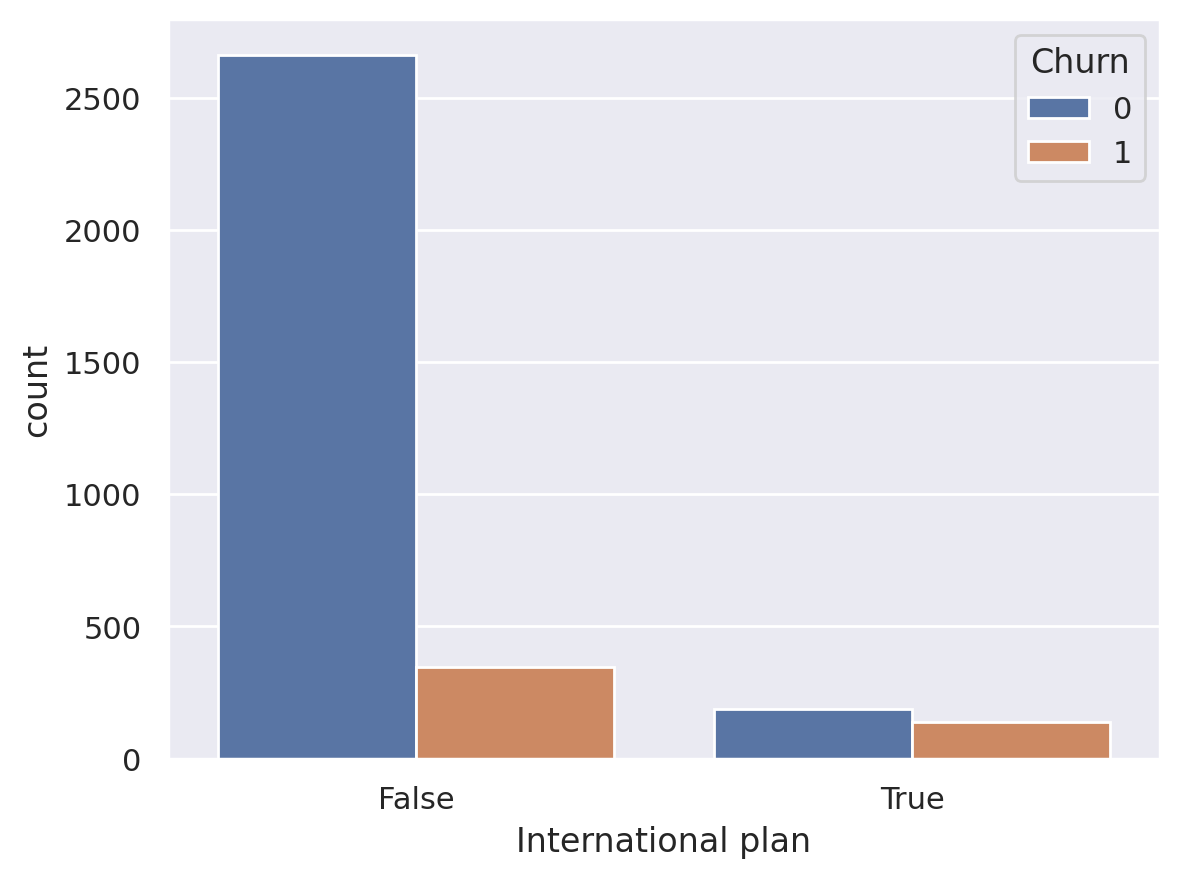

In [53]:
sns.countplot(x="International plan", hue="Churn", data=telecom_churn);


We observe that the churn rate is significantly higher with the International Plan. This is a noteworthy finding.

In [54]:
pd.crosstab(telecom_churn["Churn"], telecom_churn["Customer service calls"], margins=True)


Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


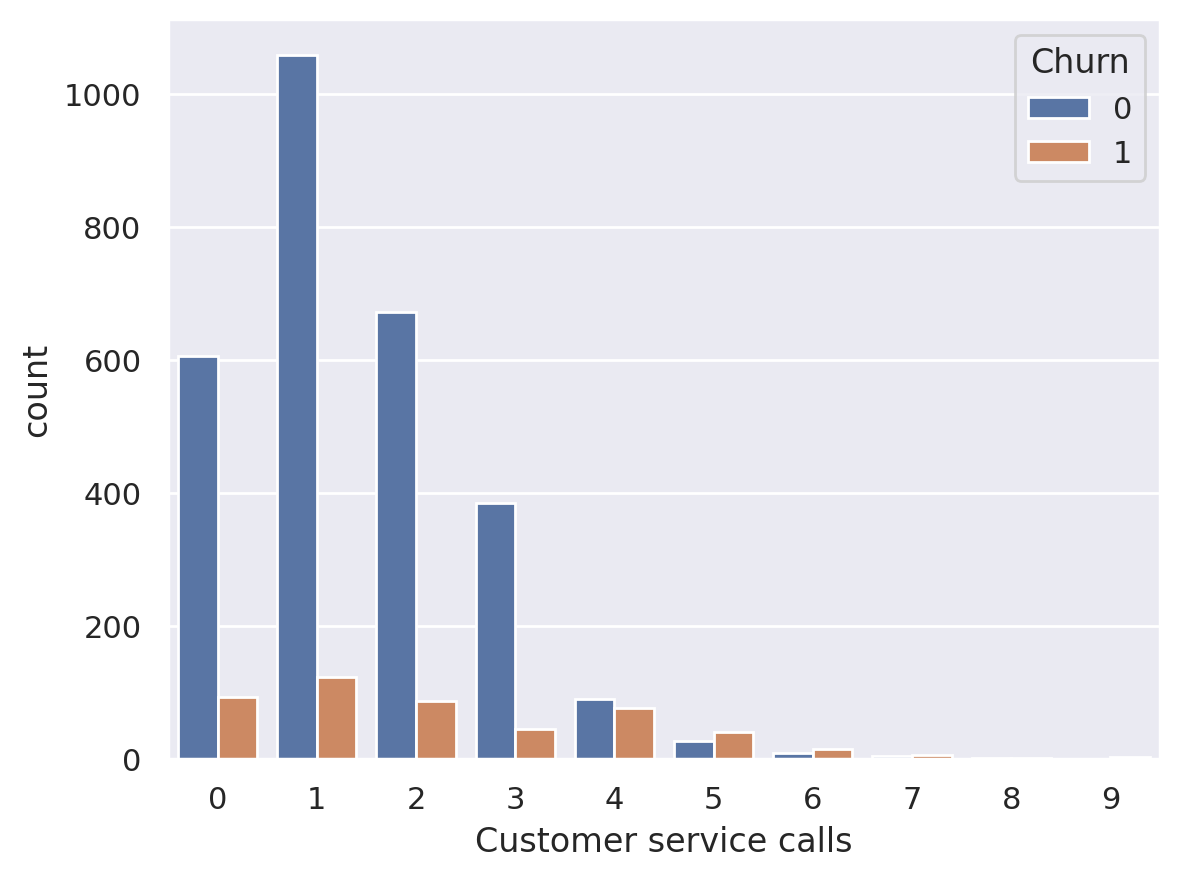

In [56]:
sns.countplot(x="Customer service calls", hue="Churn", data=telecom_churn);


You can tell  the churn rate increases sharply from 4 customer service calls and above. Now let’s add a binary feature to our DataFrame – Customer service calls > 3. And once again, let’s see how it relates to churn.

In [57]:
telecom_churn["Many_service_calls"] = (telecom_churn["Customer service calls"] > 3).astype("int")

pd.crosstab(telecom_churn["Many_service_calls"], telecom_churn["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


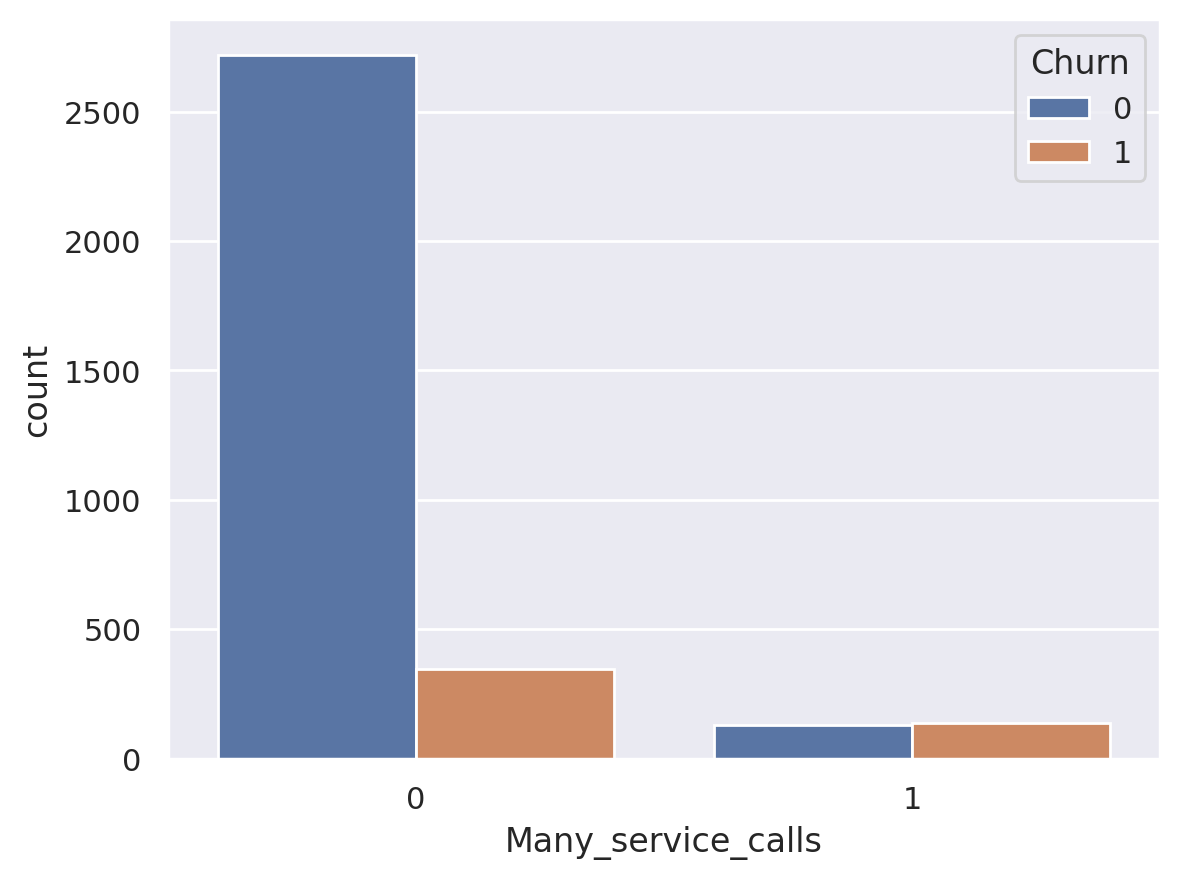

In [58]:
sns.countplot(x="Many_service_calls", hue="Churn", data=telecom_churn);

In [59]:
# Let’s construct another contingency table that relates Churn 
# with both the International plan and the freshly created Many_service_calls feature.
pd.crosstab(telecom_churn["Many_service_calls"] & telecom_churn["International plan"], telecom_churn["Churn"], margins=True)


Churn,0,1,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


Thus, by predicting that a customer will not remain loyal (Churn=1) if they have made more than 3 calls to the service center AND have added the International Plan, and predicting Churn=0 otherwise (and “otherwise” here means negation, i.e. Many_service_calls <= 3 OR International Plan is not added ), we anticipate an accuracy of 85.8%.

This 85.8% accuracy, obtained through such straightforward reasoning, serves as a useful starting point (baseline) for the development of future machine learning models.

# Summary
- The share of loyal clients in the dataset is 85.5%. The most naive model that always predicts a “loyal customer” on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (accuracy) of subsequent models should be no less than this number, and will hopefully be significantly higher;

- With the help of a simple prediction that can be expressed by the following formula: 
```International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0```,
we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we’ll talk about decision trees and figure out how to find such rules automatically based only on the input data;

- We got these two baselines without applying machine learning, and they’ll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase accuracy by only 0.5%, persay, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple “if-else” model with two conditions;

- Before training complex models, it is recommended to wrangle the data a bit, make some plots, and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.